Sofiia Popeniuk, Lushpak Victoriia

Problem Statement and Experiment Setup:
To evaluate the performance of Kruskal's algorithm, we have implemented our own version and compared its execution time with a built-in algorithm. The objective is to assess the efficiency and effectiveness of our implementation in finding minimum spanning trees compared to established algorithms.

In [27]:
!pip install networkx
!pip install matplotlib
!pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [7]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from copy import deepcopy

## Generating graph

In [8]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

In [9]:
def weight_build_in_algorithm(mstk: object) -> int:
    """
    Weight of build in algorithm.
    """
    output_weight = 0
    conections = dict(mstk.adjacency())
    edges = mstk.edges()
    for edge in edges:
        for node_num, conection in conections.items():
            if node_num == edge[0]:
                for connected_node, weight in conection.items():
                    if connected_node == edge[1]:
                        output_weight += weight['weight']
                        break
    return output_weight

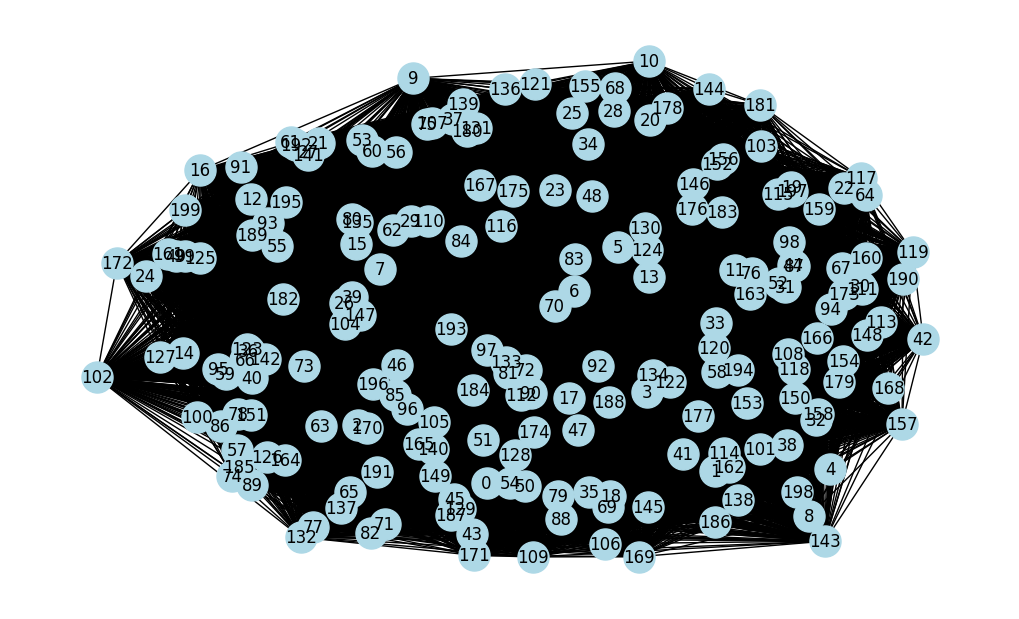

In [24]:
G = gnp_random_connected_graph(200, 1, False, True)

# For Task 1

## Kruskal's algorithm

In [17]:
from networkx.algorithms import tree

In [25]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

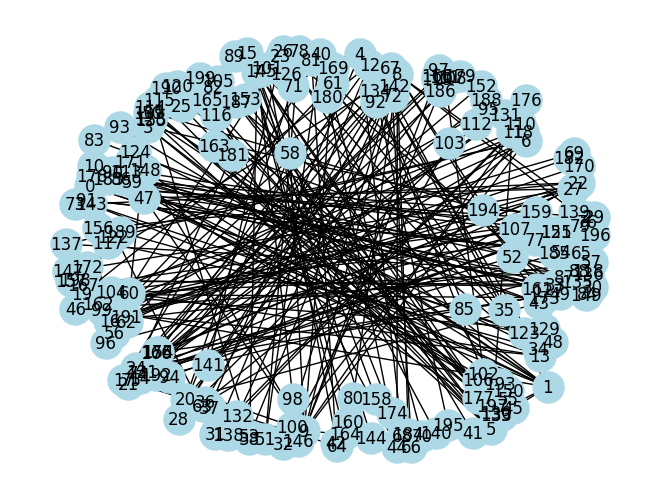

In [28]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [20]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 3), (1, 6), (1, 8), (2, 5), (2, 8), (3, 7), (4, 8), (5, 7), (8, 9)]),
 9)

In [26]:
def min_weight(conections: dict) -> tuple:
    """
    >>> min_weight({0: {1: {'weight': -4}, 2: {'weight': 9}}, 1: {0: {'weight': -4}, \
2: {'weight': 0}}, 2: {0: {'weight': 9}, 1: {'weight': 0}}})
    ((0, 1), -4)
    """
    min_start_point = 0
    min_end_point = 0
    output_weight = float("inf")
    for node_num, conection in conections.items():
        for connected_node, weight in conection.items():
            if weight['weight'] < output_weight:
                output_weight = weight['weight']
                min_start_point = node_num
                min_end_point = connected_node
    return (min_start_point, min_end_point), output_weight

def has_cycle_dfs(edges: list, current: int, visited: int, parent: int) -> bool:
    """
    Depth-first search.
    """
    visited.add(current)
    for edge in edges:
        node, neighbor = edge
        if node == current:
            if neighbor not in visited:
                if has_cycle_dfs(edges, neighbor, visited, current):
                    return True
            elif neighbor != parent:
                return True
        elif neighbor == current:
            if node not in visited:
                if has_cycle_dfs(edges, node, visited, current):
                    return True
            elif node != parent:
                return True
    return False

def has_cycle(edges: list) -> bool:
    """
    Checks if the graph contains any cycles.
    >>> has_cycle([(1, 2), (2, 3), (1, 3)])
    True
    """
    visited = set()
    for edge in edges:
        node, neighbor = edge
        if node not in visited:
            if has_cycle_dfs(edges, node, visited, None):
                return True
        if neighbor not in visited:
            if has_cycle_dfs(edges, neighbor, visited, None):
                return True
        visited.add(node)
        visited.add(neighbor)
    return False

def main(G:object) -> int:
    """
    >>> main(G) == weight_build_in_algorithm(mstk)
    True
    """
    graph = deepcopy(G)
    conections = dict(graph.adjacency())
    length = len(conections) - 1
    weight = 0
    visited = set()
    kruskal = []
    while len(kruskal) < length:
        try_conection, edge_weight = min_weight(conections)
        if (try_conection[1], try_conection[0]) not in kruskal:
            if has_cycle(kruskal + [try_conection]) is False:
                weight += edge_weight
                kruskal.append(try_conection)
                visited.add(try_conection[0])
                visited.add(try_conection[1])
        del conections[try_conection[0]][try_conection[1]]
    return weight
if __name__ == '__main__':
    import doctest
    print(doctest.testmod())    


TestResults(failed=0, attempted=3)


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [40]:
import time
from tqdm import tqdm

In [41]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:02<00:00, 337.01it/s]


0.0008059401512145997

100%|██████████| 1000/1000 [21:31<00:00,  1.29s/it]


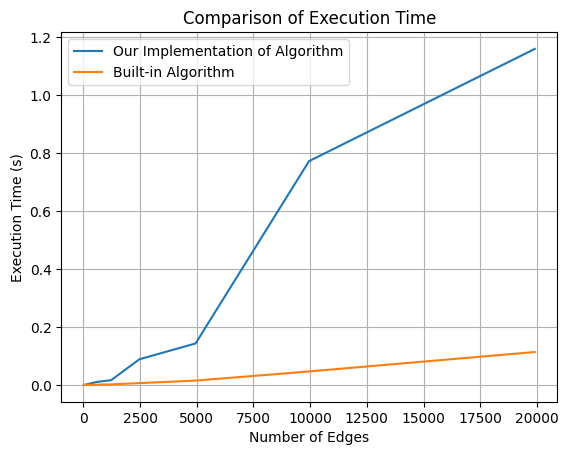

In [23]:
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_OF_ITERATIONS = 1000
graph_sizes = [10, 50, 100, 200]
fullness_levels = [0.5, 1]

main_execution_times = []
built_in_algorithm_execution_times = []
num_edges = []

for size in graph_sizes:
    for fullness in fullness_levels:
        my_time = 0
        built_in_time = 0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            G = gnp_random_connected_graph(size, fullness, False, False)
            
            start_main_execution = time.time()
            main_execution_time = main(G)
            end_main_execution = time.time()
            my_time += end_main_execution - start_main_execution
            
            start_built_in_execution = time.time()
            build_in_algorithm_execution_time = weight_build_in_algorithm(G)
            end_built_in_execution = time.time()
            built_in_time += end_built_in_execution - start_built_in_execution
        
        main_execution_times.append(my_time / 1000)
        built_in_algorithm_execution_times.append(built_in_time / 1000)
        num_edges.append(size * (size - 1) / 2 * fullness)

plt.plot(num_edges, main_execution_times, label='Our Implementation of Algorithm')
plt.plot(num_edges, built_in_algorithm_execution_times, label='Built-in Algorithm')
plt.xlabel('Number of Edges')
plt.ylabel('Execution Time (s)')
plt.title('Comparison of Execution Time')
plt.legend()
plt.grid(True)
plt.show()



1) With 25 edges, both algorithms perform quickly due to the small number of edges and the simplicity of the graph. In this case, the execution time is nearly identical because there is no significant complexity in edge selection or cycle checking.
2) Similarly to the previous case, with 45 edges, both algorithms work efficiently as the graph is still small and not complex. The difference in execution time is minimal.
3) With 615 edges, a slight difference in execution time emerges as the graph becomes slightly more complex. Although both algorithms still work quickly, it may be noticeable that our implementation starts to lag slightly behind the built-in algorithms.
4) Analogously to the previous scenario, with 1225 edges, the difference in execution time is small as the graph is not very large, and both algorithms can efficiently handle it.
5) With 2475 edges, the difference in execution time is 0.1 seconds, which may be attributed to the increased complexity of edge selection and cycle checking. Our algorithm lags in speed compared to the built-in algorithms due to less optimization.
6) With 4950 edges, the situation is similar to the previous one. The increase in edge count leads to further growth in the difference in execution time.
7) With 9950 edges, the difference in execution time is 0.7 seconds, indicating that our algorithm begins to lag in speed compared to the built-in algorithms.
8) With 19900 edges, the difference in execution time is 1.1 seconds, confirming the hypothesis that our algorithm significantly lags in speed compared to the built-in algorithms due to the increasing computational complexity.

Based on the experimental results, it is evident that for graphs with a small number of edges (up to 2000), the difference in execution time between our implementation of the Kruskal's algorithm and the built-in algorithms for minimum spanning trees is almost negligible. However, as the number of edges increases to 20000, there is a noticeable increase in the execution time of our algorithm compared to the built-in algorithms. This can be attributed to the increasing complexity of edge selection and cycle checking in the graph. The difference is likely due to the use of different libraries and optimized data structures and algorithms in the built-in algorithms, leading to their better efficiency.